In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('data/training_set_VU_DM.csv')

,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,1,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958342,2013-06-30 19:55:18,5,219,NaN,NaN,219,77700,3,4.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4958343,2013-06-30 19:55:18,5,219,NaN,NaN,219,88083,3,4.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4958344,2013-06-30 19:55:18,5,219,NaN,NaN,219,94508,3,3.5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4958345,2013-06-30 19:55:18,5,219,NaN,NaN,219,128360,3,5.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,157.84,1


In [22]:
df = df.drop(['srch_id'], axis = 1)

In [23]:
corr_matrix = df.corr()

In [157]:
df['booking_bool'].unique()

array([0, 1])

In [37]:
tot = {col: 0 for col in corr_matrix.columns}
for x in corr_matrix.columns:
    for y in corr_matrix.columns:
        if x != y:
            correlation = corr_matrix[x][y]
            if correlation:
                tot[x] += abs(correlation)
                tot[y] += abs(correlation)

In [49]:
tot_list = [(x, tot[x]) for x in tot]

In [86]:
so = sorted(tot_list, key = lambda x: x[1])[:-3]
so = [x[0] for x in so]

In [147]:
from copy import deepcopy

def draw_matrix(cols, matrix):
    m = deepcopy(matrix)
    for x in matrix.columns:
        if x not in cols:
            try:
                m.drop([x], axis=1,  inplace=True)
            except:
                pass
            try:
                m.drop([x], axis=0,  inplace=True)
            except:
                pass
    sns.set(rc = {'figure.figsize':(14,10)})
    sns.heatmap(m, cmap='Blues', vmin=-1, vmax=1)

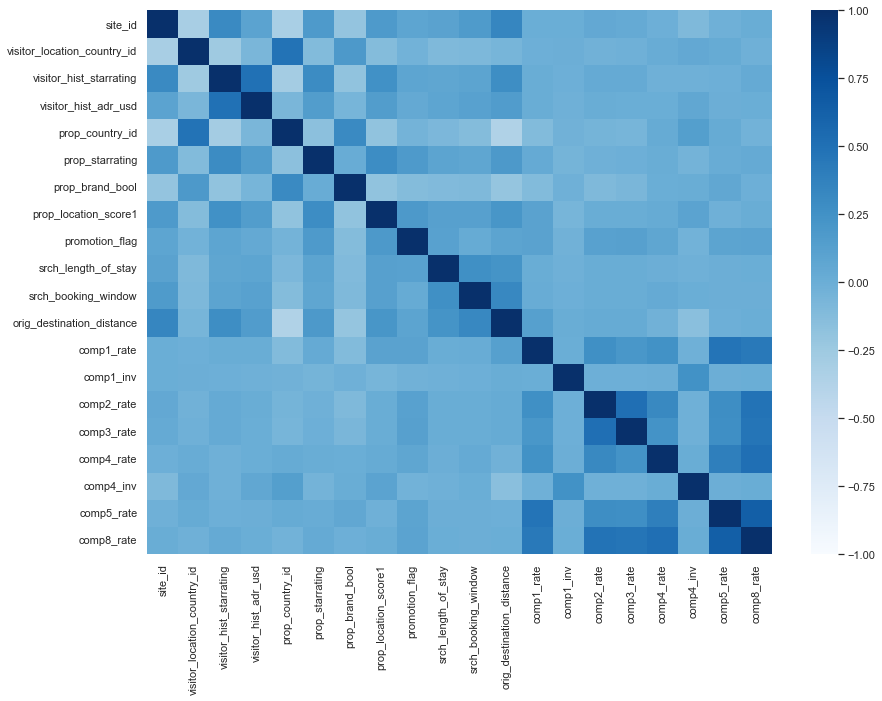

In [148]:
draw_matrix(so[len(so)-20:], corr_matrix)

In [151]:
len(df.columns)

53

In [158]:
yss = pd.read_feather('data/')

In [160]:
yss['target'].unique()

array([0, 5, 1])

In [162]:
yss = pd.read_feather('data/y_train.feather')
other = pd.read_feather('data/y_val.feather')

In [178]:
other['target'].value_counts() + yss['target'].value_counts()

0    4266068
5     124585
1      75262
Name: target, dtype: int64

In [179]:
totall = 4266068 + 124585 + 75262

In [186]:
124585 / totall

0.027896858762426063

In [ ]:
96 + 2 + 

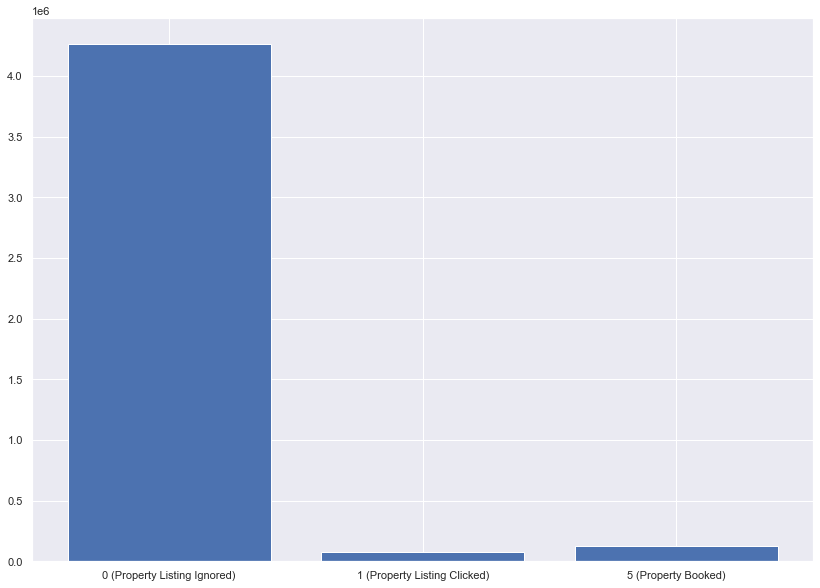

In [176]:
labels = ['0 (Property Listing Ignored)', '1 (Property Listing Clicked)', '5 (Property Booked)']

values = [4266068, 75262, 124585]

ax = plt.bar(labels, values)